Importing the modules

# Welcome to the notebook 🙂

### Task 1 - Importing the Dataset

In [ ]:
import numpy as np
import pandas as pd

# Importing neural network modules
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
# Importing some machine learning modules
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Import data visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

print("Modules are imported!")

Modules are imported!


Importing the data

In [6]:
data = pd.read_csv("Creditcard_dataset.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
1,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
2,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
3,10,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
4,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0


(50492, 31)

Check the data shape

In [9]:
data.shape

(50492, 31)

Let's see how many genuine and limited fraudulent records we have

In [10]:
data.Class.value_counts()

Class
0    50000
1      492
Name: count, dtype: int64

### Task 2 - Data Preprocessing and Exploration

*   Removing all the rows with `Nan` values
*   Removing `Time` column
*   Feature Scaling `Amount` column
*   Split the data into features and labels
*   Data Exploration


Removing the rows `Nan` values in the dataset

In [11]:
data.dropna(inplace=True)
data.shape

(50492, 31)

Removing Time column

In [12]:
data = data.drop(axis = 1, columns = 'Time')
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
1,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
2,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,1.626659,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
3,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
4,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,0.460230,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0


Feature Scaling of Amount column

In [13]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.150105,0
1,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.199848,0
2,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,1.626659,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,-0.339490,0
3,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.330223,0
4,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,0.460230,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,-0.256128,0


Let's split the genuine and fraud records into separate dataframes

In [14]:
data_fraud = data[data.Class == 1]
data_genuine = data[data.Class == 0]

data_fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
50000,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.372497,1
50001,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.866017,1
50002,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.642790,1
50003,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.122833,1
50004,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.368265,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50487,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.277825,1
50488,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.369281,1
50489,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.042898,1
50490,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.664244,1


Split the data into features and labels

In [15]:
X = data.drop("Class", axis = 1)
y = data.Class

Data Exploration
  - Apply PCA to reduce the dimensionality of features `X` into two dimensions
  - Use a scatter plot to visualize our data

In [17]:
pca = PCA(2)
transformed_data = pca.fit_transform(X)
df = pd.DataFrame(transformed_data)
df['label'] = y
df

,0,1,label
0,-0.447839,1.197468,0
1,-0.582386,0.257786,0
2,-0.939395,-0.728114,0
3,-0.630767,-0.499070,0
4,-0.536286,-1.055396,0
...,...,...,...
50487,10.855750,-2.787318,1
50488,6.927752,-4.949665,1
50489,7.038194,-2.785129,1
50490,11.649177,-1.991720,1


Let's Use a scatter plot to visualize our data

In [18]:
px.scatter(df, x = 0, y = 1, color = df.label.astype(str))

### Task 3 - Building the Generator Model

Write a method to create the Generator model architecture

In [30]:
def build_generator():#tensoeroflowdan aldığımız sequaletial model
  model = Sequential()

  model.add(Dense(32, activation = 'relu', input_dim = 29, kernel_initializer = 'he_uniform'))#for noise
  model.add(BatchNormalization())# for speed up and better performans

  #defining the hidden layer
  model.add(Dense(64, activation = 'relu'))
  model.add(BatchNormalization())# for speed up and better performans

  #defining the second hidden layer
  model.add(Dense(128, activation = 'relu'))
  model.add(BatchNormalization())# for speed up and better performans

  #definig the output layer
  model.add(Dense(29, activation = 'linear')) #number of input (num of fetures of our data set)
  model.summary()

  return model
build_generator()





Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 32)                960       
                                                                 
 batch_normalization_16 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_57 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_17 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_58 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_18 (Ba  (None, 128)             

### Task 4 - Building the Discriminator Model

Write a method to create the Discriminator model architecture

In [21]:
def build_discriminator():
  model = Sequential()

  #imput layer
  model.add(Dense(128, input_dim = 29, activation = 'relu', kernel_initializer = 'he_uniform'))

  #hidden layer
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(16, activation = 'relu'))


  model.add(Dense(1, activation = 'sigmoid'))#1 ile 0 arasında deperler döndürdüğü için sigmmoid
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

  model.summary()
  return model
build_discriminator()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               3840      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 15777 (61.63 KB)
Trainable params: 15777

### Task 5 - Combine Generator and Discriminator models to Build The GAN

In [23]:
def build_gan(generator, discriminator):
  #for freezing dicriminator for train (bunu yapmazsak discriminator fake datayı anlar her seferinde bu sebebten fake data oluşturamayız)
  discriminator.trainable = False#yapmazsak  generator progress sağlayamaz çünkü discrimintor atasını hep yakalar
  #en son trrin edince discriminator her seferinde daha iyi olucak çünkü generator kendini daha iyi eğiticek

  #input layer of gand  EQUAL to input layer of generator
  gan_input = Input(shape = (generator.input_shape[1],))
  #pass data from input layer to discriminator
  x = generator(gan_input)
  gan_output = discriminator(x)

  #creating gan model
  gan = Model(gan_input, gan_output)
  gan.summary()
  return gan


Let's create a method that generates synthetic data using the Generator

In [24]:
def generate_synthetic_data(generator, numberOfSamples):
  noise = np.random.normal(0,1, (numberOfSamples , generator.input_shape[1]))
  fake_data = generator.predict(noise)
  return fake_data

### Task 6 - Train and evaluate our GAN
*    Defining some variables
*    Creating our GAN
*    Training the GAN
*    Monitor the GAN performance using PCA




In [31]:
def monitor_generator(generator):
    # Initialize a PCA (Principal Component Analysis) object with 2 components
    pca = PCA(n_components=2)

    # Drop the 'Class' column from the fraud dataset to get real data
    real_fraud_data = data_fraud.drop("Class", axis=1)

    # Transform the real fraud data using PCA
    transformed_data_real = pca.fit_transform(real_fraud_data.values)

    # Create a DataFrame for the transformed real data and add a 'label' column with the value 'real'
    df_real = pd.DataFrame(transformed_data_real)
    df_real['label'] = "real"

    # Generate synthetic fraud data using the provided generator and specify the number of samples (492 in this case)
    synthetic_fraud_data = generate_synthetic_data(generator, 492)

    # Transform the synthetic fraud data using PCA
    transformed_data_fake = pca.fit_transform(synthetic_fraud_data)

    # Create a DataFrame for the transformed fake data and add a 'label' column with the value 'fake'
    df_fake = pd.DataFrame(transformed_data_fake)
    df_fake['label'] = "fake"

    # Concatenate the real and fake data DataFrames
    df_combined = pd.concat([df_real, df_fake])

    # Create a scatterplot to visualize the data points, using the first and second PCA components as x and y, respectively,
    # and color points based on the 'label' column, with a size of 10
    plt.figure()
    sns.scatterplot(data=df_combined, x=0, y=1, hue='label', s=10)
    plt.show()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 32)                960       
                                                                 
 batch_normalization_19 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_61 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_20 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_62 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_21 (Ba  (None, 128)             

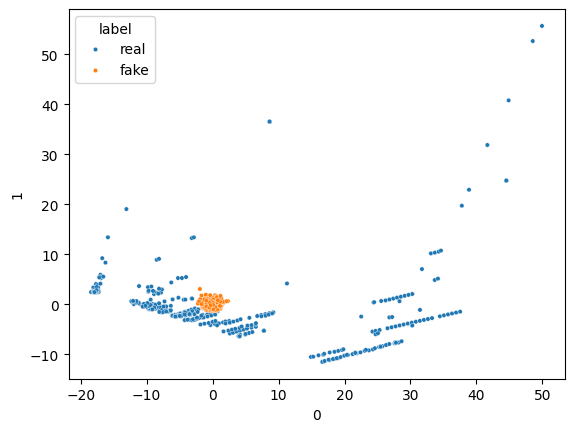

16/16 [==============================] - 0s 2ms/step


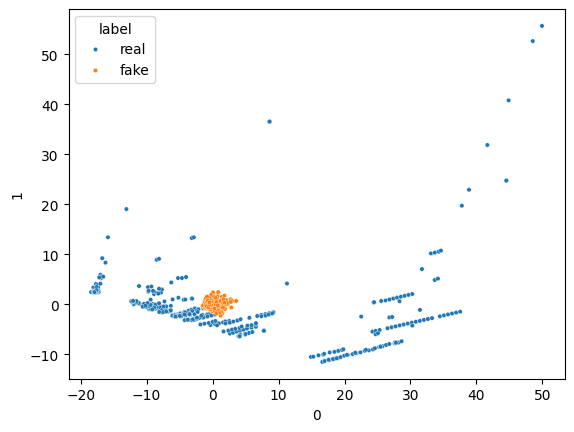

16/16 [==============================] - 0s 2ms/step


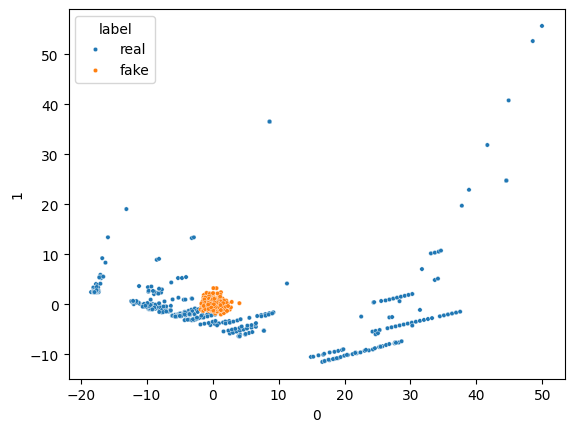

16/16 [==============================] - 0s 2ms/step


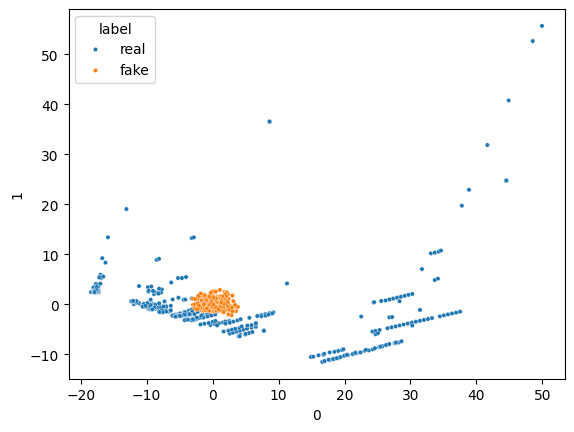

16/16 [==============================] - 0s 2ms/step


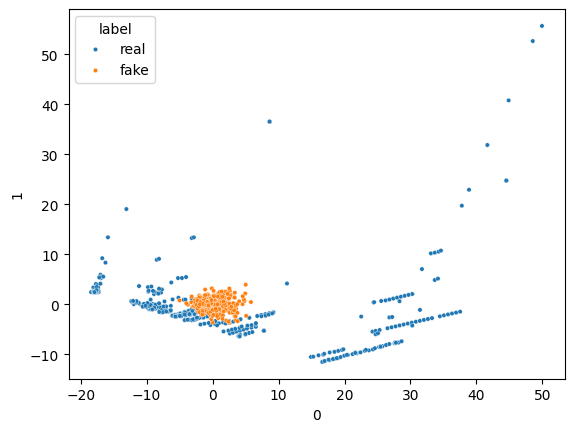

16/16 [==============================] - 0s 2ms/step


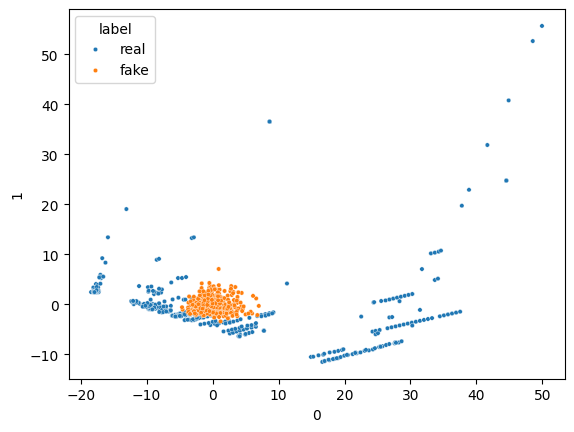

16/16 [==============================] - 0s 2ms/step


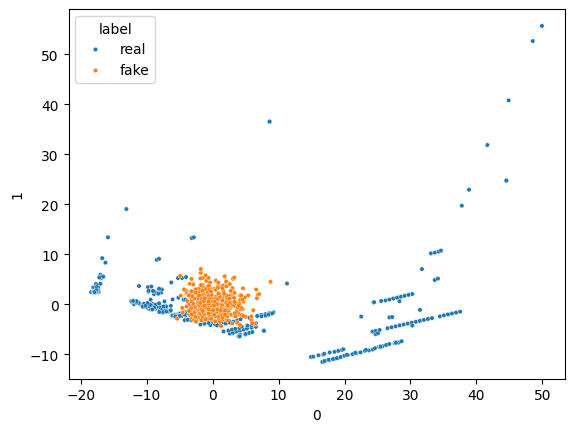

16/16 [==============================] - 0s 2ms/step


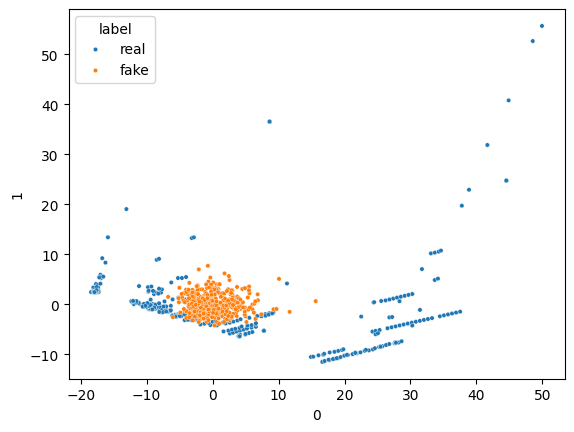

16/16 [==============================] - 0s 3ms/step


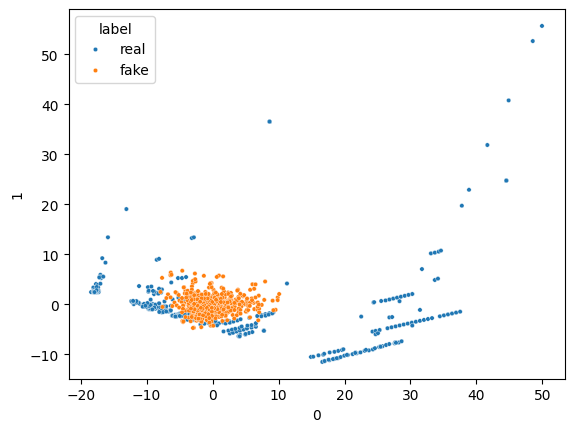

16/16 [==============================] - 0s 2ms/step


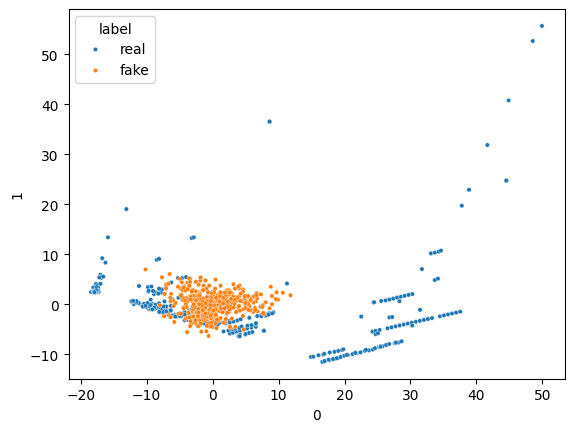

1/1 [==============================] - 0s 35ms/step


In [32]:
generator = build_generator()
discriminator = build_discriminator()

gan = build_gan(generator=generator, discriminator= discriminator)
gan.compile(optimizer = 'adam', loss = 'binary_crossentropy')

num_of_epochs = 1000
batch_size = 64
half_batch = int (batch_size / 2)

for epoch in range(num_of_epochs):
  # we are generate 32 data point our generator
  X_fake = generate_synthetic_data(generator= generator, numberOfSamples= half_batch)
  #define label thats are going to indicate that this half a batch is synthetic fraudulent
  y_fake = np.zeros((half_batch,1))

  X_real = data_fraud.drop("Class", axis = 1).sample(half_batch)
  y_real = np.ones((half_batch,1))

  discriminator.trainable = True

  discriminator.train_on_batch(X_real, y_real)
  discriminator.train_on_batch(X_fake, y_fake)
  #discriminator learn how to distinguish fake or real

  noise = np.random.normal(0,1, (batch_size , 29))
  gan.train_on_batch(noise, np.ones((batch_size, 1)))

  if epoch % 10 == 0:
    monitor_generator(generator= generator)






,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,label
0,-1.952200,-0.104831,-0.691286,1.437486,0.738804,0.973720,1.048874,-0.021201,-0.072843,-0.719138,...,0.256601,0.539367,0.004104,-0.403896,-1.126381,-0.160217,0.336117,-0.887258,1.640011,fake
1,-0.301807,0.633638,0.476911,0.344565,0.517518,-0.999535,-0.382242,-0.679977,1.639164,-0.751881,...,-0.017282,-0.273597,0.198182,0.255220,1.192292,-0.997596,-0.711813,0.636029,-0.247001,fake
2,-1.325065,2.103920,-0.622239,2.459971,0.395618,-2.196104,-2.270515,0.261600,0.891022,-1.985191,...,1.381005,-1.488598,2.102776,0.357451,-0.612986,-0.292733,-0.309379,-0.013708,-0.371646,fake
3,-0.971073,0.094730,-0.325662,1.327467,0.122260,-1.685132,-0.314399,-0.833544,0.463648,-0.446734,...,0.179603,-0.270315,0.195418,1.096437,0.514706,-0.371798,-0.457146,0.903539,-0.814494,fake
4,-2.284431,0.380772,-0.627674,2.852044,0.776823,-0.516914,-3.415809,-1.976765,-0.373079,-2.505057,...,2.180547,-1.101080,0.112948,-1.731939,0.549480,0.304707,0.655249,-1.041731,0.394761,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.063099,-0.212365,-1.173733,2.020279,0.899643,1.675358,2.647971,0.110220,-0.294459,1.125055,...,-0.012814,1.423023,-0.303361,-0.111322,-1.310140,0.451136,1.294549,-0.719352,0.600644,fake
996,1.253289,-2.246740,2.714802,-0.602945,-0.460829,0.110551,-0.053444,-0.423663,2.163279,-0.678826,...,-1.334874,-0.949184,-1.207937,-0.005496,2.213793,-0.613498,-0.010815,0.436412,0.217161,fake
997,-0.548991,-0.804379,-0.520851,0.630629,1.186510,0.792844,-0.540454,-1.409441,-0.454993,0.985754,...,0.829248,0.399777,-1.745367,-1.158062,-0.010040,0.283522,1.518029,-1.156520,0.314104,fake
998,-0.740601,0.066165,-0.100537,0.498347,0.322657,-1.217313,-0.462613,-1.137468,0.519129,-0.908544,...,0.196501,-0.599469,0.107859,0.120355,0.988949,-0.401140,-0.466373,0.503865,-0.310621,fake


### Task 7 - Generate synthetic data using the trained Generator

*   Generate 1000 fradulent data points using the trained generator
*   Compare the distribution of `real` and `synthetic` fradulent data points.


In [35]:
synthetic_data = generate_synthetic_data(generator, 1000)
df = pd.DataFrame(synthetic_data)
df['label'] = 'fake'
df_2 = data_fraud.drop('Class', axis = 1)
df_2['label'] = 'real'

df_2.columns = df.columns

combined_df = pd.concat([df,df_2])
combined_df


32/32 [==============================] - 1s 15ms/step


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,label
0,-1.952200,-0.104831,-0.691286,1.437486,0.738804,0.973720,1.048874,-0.021201,-0.072843,-0.719138,...,0.256601,0.539367,0.004104,-0.403896,-1.126381,-0.160217,0.336117,-0.887258,1.640011,fake
1,-0.301807,0.633638,0.476911,0.344565,0.517518,-0.999535,-0.382242,-0.679977,1.639164,-0.751881,...,-0.017282,-0.273597,0.198182,0.255220,1.192292,-0.997596,-0.711813,0.636029,-0.247001,fake
2,-1.325065,2.103920,-0.622239,2.459971,0.395618,-2.196104,-2.270515,0.261600,0.891022,-1.985191,...,1.381005,-1.488598,2.102776,0.357451,-0.612986,-0.292733,-0.309379,-0.013708,-0.371646,fake
3,-0.971073,0.094730,-0.325662,1.327467,0.122260,-1.685132,-0.314399,-0.833544,0.463648,-0.446734,...,0.179603,-0.270315,0.195418,1.096437,0.514706,-0.371798,-0.457146,0.903539,-0.814494,fake
4,-2.284431,0.380772,-0.627674,2.852044,0.776823,-0.516914,-3.415809,-1.976765,-0.373079,-2.505057,...,2.180547,-1.101080,0.112948,-1.731939,0.549480,0.304707,0.655249,-1.041731,0.394761,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50487,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.277825,real
50488,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.369281,real
50489,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.042898,real
50490,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.664244,real


Checking the individual feature distribution of `synthetic` and `real` fraud data.

In [36]:
for col in combined_df.columns:
  plt.figure()
  fig = px.histogram(combined_df, color = 'label', x=col,barmode="overlay", title = f'Feature {col}', width = 640, height = 500)
  fig.show()

<ipython-input-36-7712b9dc83b8>:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X = combined_df.drop("label", axis=1)
y = combined_df["label"]

# Eğitim ve test setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier oluştur
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# RandomForestClassifier'ı eğit
rf_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = rf_classifier.predict(X_test)

# Sınıflandırma raporu ve karışıklık matrisi
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

        fake       0.96      0.99      0.98       193
        real       0.99      0.93      0.96       106

    accuracy                           0.97       299
   macro avg       0.98      0.96      0.97       299
weighted avg       0.97      0.97      0.97       299

[[192   1]
 [  7  99]]


NameError: name 'X_train_ns' is not defined